# Classification of MNIST Dataset using CNN by `Mr. Harshit Dawar`!

In [20]:
#Importing the required classes 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from seaborn import heatmap as HM
import numpy as np

In [2]:
# Importing Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [3]:
# Reshaping the Data acoording to the CNN requirements
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [4]:
# Checking the number of output classes
number_of_classes = len(set(y_train))

In [5]:
model = Sequential()
model.add(Conv2D(filters = 32,
                kernel_size = (3,3),
#                 strides = 2,
                 activation = "relu",
                 input_shape = x_train[0].shape
                ))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters = 64,
                kernel_size = (3,3),
#                 strides = 2,
                 activation = "relu"                
                ))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters = 128,
                kernel_size = (3,3),
#                 strides = 2,
                 activation = "relu",
                ))

model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(number_of_classes, activation = "softmax"))

In [6]:
# Checking the summary of the Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [7]:
# Compiling and Fitting the Model

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
trained_model = model.fit(x_train,
                         y_train,
                         verbose = 1,
                          epochs = 10,
                          validation_data=(x_test, y_test)
                         )


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 806us/step - loss: 0.2437 - accuracy: 0.9230 - val_loss: 0.0650 - val_accuracy: 0.9788
Epoch 2/10
60000/60000 [==============================] - 50s 840us/step - loss: 0.0894 - accuracy: 0.9738 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 3/10
60000/60000 [==============================] - 49s 816us/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.0542 - val_accuracy: 0.9848
Epoch 4/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0542 - val_accuracy: 0.9856
Epoch 6/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0410 - val_accuracy: 0.9884
Epoch 7/10
60000/60000 [==============================] - 

In [11]:
y_pred = model.predict_classes(x_test)

## Plotting the Model Result

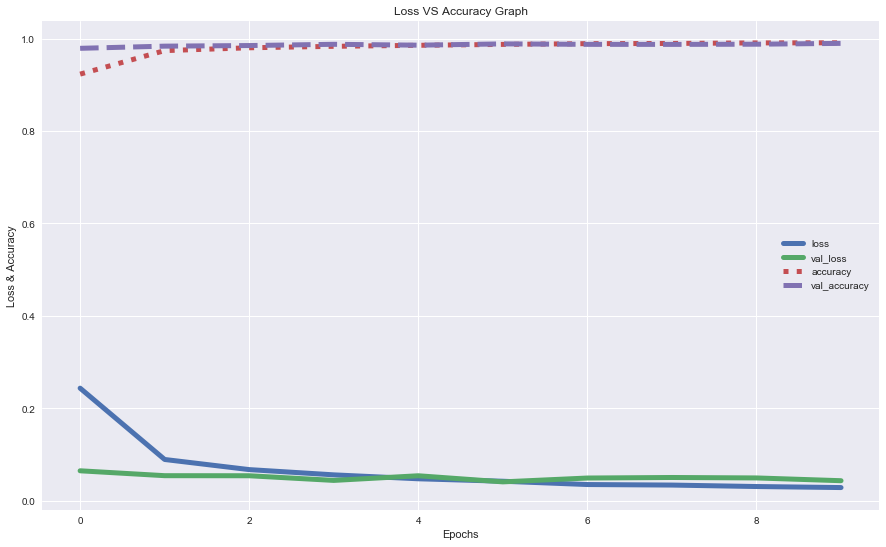

In [19]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.figure(figsize = (15,9))
plt.plot(trained_model.history["loss"], label = "loss", linewidth = 5)
plt.plot(trained_model.history["val_loss"], label = "val_loss", linewidth = 5)
plt.plot(trained_model.history["accuracy"], label = "accuracy", linestyle = "dotted", linewidth = 5)
plt.plot(trained_model.history["val_accuracy"], label = "val_accuracy", linestyle = "--", linewidth = 5)
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")
plt.title("Loss VS Accuracy Graph")
plt.legend()
plt.show()

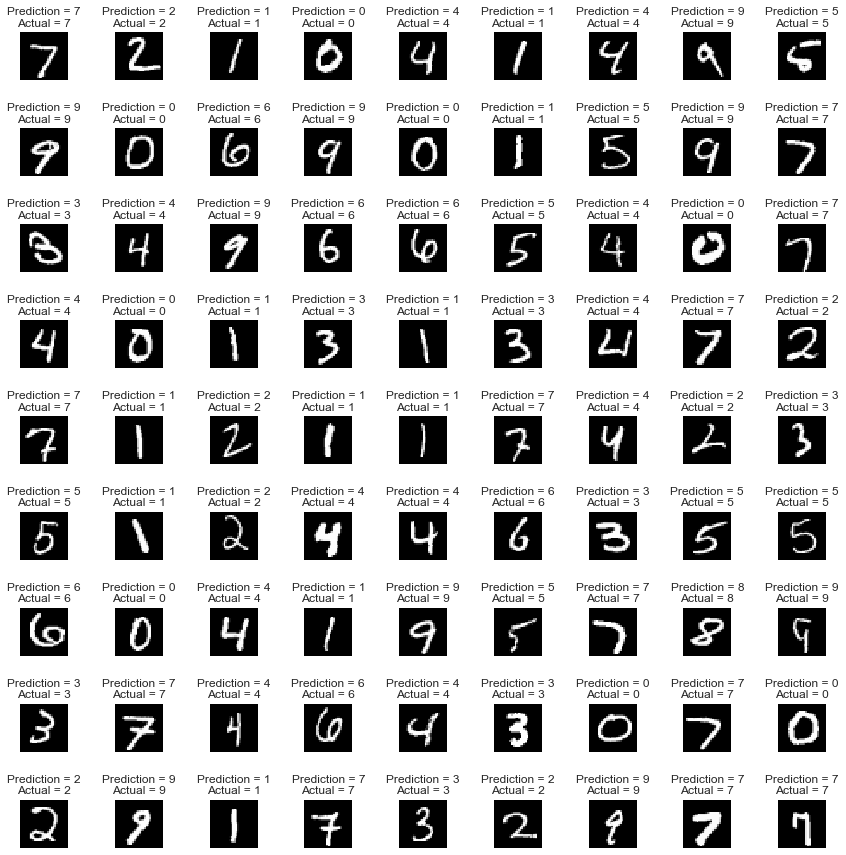

In [10]:
fig, ax = plt.subplots(9,9, figsize = (15,15))
ax = ax.ravel()

for i in np.arange(0, 81):
    ax[i].imshow(x_test[i].reshape(x_test[i].shape[0], x_test[i].shape[1] ), cmap = "gray")
    ax[i].set_title("Prediction = {}\nActual = {}".format(y_pred[i], y_test[i]))
    ax[i].axis("off")

plt.subplots_adjust(hspace = 1)

In [12]:
# Creating consusion matrix
cm = confusion_matrix(y_test, y_pred)

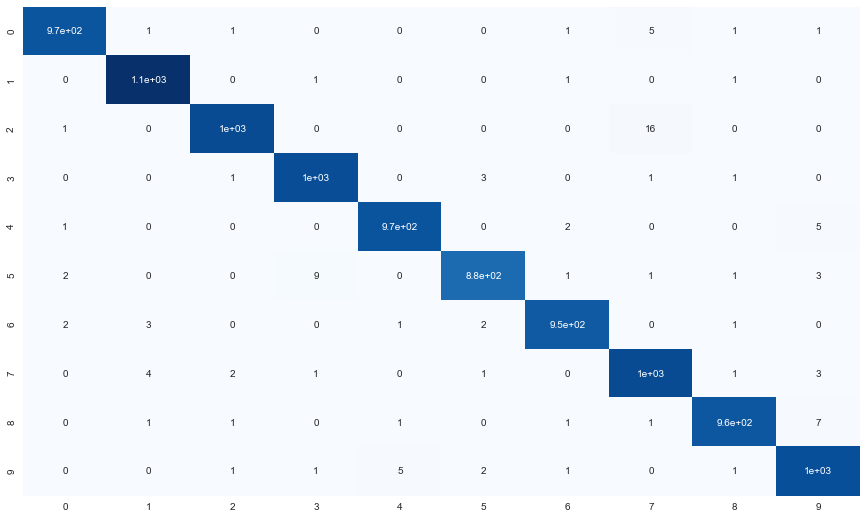

In [18]:
# Plotting heatmap
plt.figure(figsize = (15,9))
HM(cm, annot = True, cmap = "Blues", cbar = False)
plt.show()

# Completed the Project!